we will explore the softmax function. This function is used in both Softmax Regression and in Neural Networks when solving Multiclass Classification problems. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
# %matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Softmax Function
In both softmax regression and neural networks with Softmax outputs, N outputs are generated and one output is selected as the predicted category. In both cases a vector $\mathbf{z}$ is generated by a linear function which is applied to a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will add to 1, so that they can be interpreted as probabilities. The larger inputs  will correspond to larger output probabilities.

In [3]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

Below, vary the values of the `z` inputs using the sliders.

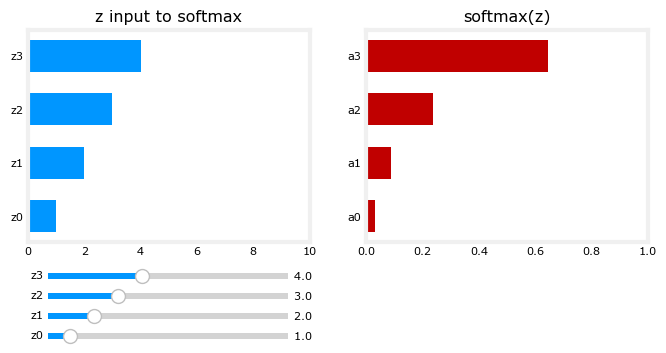

In [4]:
plt.close("all")
plt_softmax(my_softmax)

In [5]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

In [6]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 0.7893
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.2834
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1378
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0908
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0704
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0596
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0528
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0482
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0409


In [7]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 [==============================] - 0s 1ms/step
[[2.56e-03 3.37e-03 9.72e-01 2.20e-02]
 [9.95e-01 4.01e-03 7.26e-04 8.50e-05]]
largest value 0.9999994 smallest value 3.6930206e-09


### Preferred
Recall from lecture, more stable and accurate results can be obtained if the softmax and loss are combined during training.   This is enabled by the 'preferred' organization shown here.

In [8]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)
        

Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 1.0715
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 0.4543
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.2388
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1428
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1004
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0570
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0530


Output Handling

Notice that in the preferred model, the outputs are not probabilities, but can range from large negative numbers to large positive numbers. The output must be sent through a softmax when performing a prediction that expects a probability. Let's look at the preferred model outputs:


In [9]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 [==============================] - 0s 1ms/step
two example output vectors:
 [[-3.08 -2.9   2.81 -0.75]
 [ 6.25  1.41 -4.88 -7.36]]
largest value 11.465279 smallest value -17.826372


The output predictions are not probabilities! If the desired output are probabilities, the output should be be processed by a softmax.

In [10]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[2.67e-03 3.22e-03 9.67e-01 2.74e-02]
 [9.92e-01 7.91e-03 1.46e-05 1.22e-06]]
largest value 0.99999833 smallest value 1.9000943e-13


To select the most likely category, the softmax is not required. One can find the index of the largest output using np.argmax().

In [11]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-3.08 -2.9   2.81 -0.75], category: 2
[ 6.25  1.41 -4.88 -7.36], category: 0
[ 4.77  1.32 -3.91 -5.72], category: 0
[-0.59  3.69 -3.32 -0.18], category: 1
[-0.72 -5.76  5.04 -6.09], category: 2


SparseCategorialCrossentropy or CategoricalCrossEntropy

Tensorflow has two potential formats for target values and the selection of the loss defines which is expected.

    SparseCategorialCrossentropy: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9.
    CategoricalCrossEntropy: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].

